In [1]:
from keras.layers import Conv2D

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense 
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,stratify=Y_train,test_size=0.08333,random_state=42)

In [7]:
X_train=X_train.reshape(-1,28,28,1)
X_val=X_val.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
print('train data shape: ', X_train.shape)
print('val data shape: ', X_val.shape)
print('test data shape: ', X_test.shape)

train data shape:  (55000, 28, 28, 1)
val data shape:  (5000, 28, 28, 1)
test data shape:  (10000, 28, 28, 1)


In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

In [10]:
from keras.layers import Flatten
model.add(Flatten())

In [11]:
model.add(Dense(128,activation='relu'))

In [12]:
model.add(Dense(10,activation='softmax'))

In [25]:
from tensorflow import keras

In [26]:
pip install Adam

Note: you may need to restart the kernel to use updated packages.


In [27]:
optimizer = keras.optimizers.Adam(lr=0.0001)

C:\Users\asus\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = optimizer,metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 128)               2769024   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train,Y_train,epochs=20,batch_size = 128,validation_data = (X_val,Y_val))

Epoch 1/20
430/430 [==============================] - 18s 40ms/step - loss: 0.7337 - accuracy: 0.8944 - val_loss: 0.2629 - val_accuracy: 0.9354
Epoch 2/20
430/430 [==============================] - 17s 39ms/step - loss: 0.1560 - accuracy: 0.9573 - val_loss: 0.1994 - val_accuracy: 0.9486
Epoch 3/20
430/430 [==============================] - 17s 38ms/step - loss: 0.0923 - accuracy: 0.9729 - val_loss: 0.2132 - val_accuracy: 0.9554
Epoch 4/20
430/430 [==============================] - 16s 38ms/step - loss: 0.0569 - accuracy: 0.9830 - val_loss: 0.1827 - val_accuracy: 0.9616
Epoch 5/20
430/430 [==============================] - 16s 38ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.1388 - val_accuracy: 0.9722
Epoch 6/20
430/430 [==============================] - 17s 39ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.1447 - val_accuracy: 0.9696
Epoch 7/20
430/430 [==============================] - 17s 39ms/step - loss: 0.0176 - accuracy: 0.9937 - val_loss: 0.1634 - val_accuracy:

In [35]:
loss,acc = model.evaluate(X_test,Y_test)
print('Test Loss:',loss)
print('Accuracy:',acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.1577 - accuracy: 0.9796
Test Loss: 0.15773269534111023
Accuracy: 0.9796000123023987


In [39]:
import numpy as np
def loss_plot(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize = (9,5))
    plt.plot(np.arange(1,21),train_acc,marker = '*',label = 'Training Accuracy')
    plt.plot(np.arange(1,21),val_acc,marker = 'o',label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train/Validation Accuracy')
    plt.legend()
    plt.margins(0.02)
    plt.show()
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,21),train_loss,marker = '*',label = 'Training Loss')
    plt.plot(np.arange(1,21),val_loss,marker = 'o',label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train/Validation loss')
    plt.legend()
    plt.margins(0.02)
    plt.show()

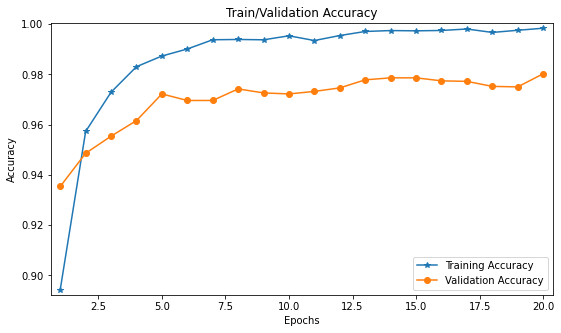

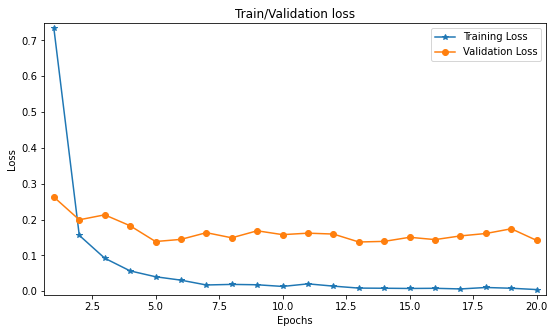

In [40]:
loss_plot(history)